<a href="https://colab.research.google.com/github/ZT3M3N/summarizer/blob/main/Resumen_ES_con_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***OBTENCIÓN DEL TEXTO PARA GENERARLE EL RESUMEN MEDIANTE WEB SCRAPING EN PYTHON:***



In [ ]:
import requests #  Módulo para realizar solicitudes HTTP en la web
from bs4 import BeautifulSoup # Biblioteca que se utiliza para analizar y extraer datos de documentos HTML

# PÁGINA DE ENCICLOPEDIA: https://es.wikipedia.org/wiki/Inteligencia_artificial
# PÁGINA DE NOTICIAS: https://www.diariodepalenque.com.mx/2022/05/dolar-se-vende-en-19-56-pesos-su-mejor-nivel-en-16-meses/
# PÁGINA DE BLOG: https://www.codificandobits.com/blog/redes-transformer/
# PÁGINA QUE NO PERMITE HACER WEB SCRAPING: https://paginaspersonales.deusto.es/airibar/ed_digital/html/html_1.html

#Aplicando web scraping para obtener el texto a resumir
url = "https://zt3m3n.github.io/noticia4.html"
page = requests.get(url)
scraping = BeautifulSoup(page.content, "html.parser")

# Extraccion de solo las etiquetas "p"
texto = " ".join([p.text for p in scraping.find_all("p")])

print(texto)

El morphing de suplantación de identidad es una técnica que consiste en manipular la fotografía de un documento de identidad para que se parezca a dos personas diferentes. De esta forma, se puede engañar a los sistemas biométricos faciales que se usan en los controles de fronteras, aeropuertos, bancos o páginas web.

        El morphing se basa en la interpolación de dos imágenes, una de la víctima y otra del impostor, para crear una imagen intermedia que contenga rasgos de ambas. Para lograr este efecto, se utilizan algoritmos de inteligencia artificial que distorsionan los píxeles y el color de las imágenes originales.
        
        El resultado es una imagen falsa que puede pasar por válida ante los sistemas de reconocimiento facial, ya que se parece lo suficiente a las dos personas implicadas. Así, el impostor puede usar el documento falsificado para viajar, acceder a servicios o cometer delitos suplantando la identidad de la víctima.
        
        El morphing de suplantación

In [ ]:
import re # Módulo para limpiar texto
#Limpiar texto
texto_limpio = re.sub(r'\[[0-9]+\]|\u200b|[A-Z][a-z]+\s+(\w+\s)*\w+,\s\d{4},\spp\.\s\d+–\d+', " ", texto)
texto_limpio = texto_limpio.replace("\n", "").replace(":", ".").replace("  ", "")

In [ ]:
# Extraer el título de la página (etiqueta h1)
titulo = scraping.find('h2').get_text()

# Mostrar el título y el texto a resumir
print(titulo + ":\n")

print(texto_limpio)

#Adaptar resultados a pantalla
from IPython.core.display import display, HTML
display(HTML("<style>pre { white-space: pre-wrap; }</style>"))

Morphing de suplantación de identidad: una amenaza para la seguridad.:

El morphing de suplantación de identidad es una técnica que aprovecha el avance de la inteligencia artificial para crear imágenes falsas que engañan a los sistemas biométricos faciales. Se trata de una amenaza que puede poner en peligro la seguridad y la identidad de las personas, y que requiere una respuesta coordinada y eficaz por parte de las autoridades y la sociedad.


In [ ]:
# Número de palabras en texto original
palabras = texto_limpio.split()
num_palabras = len(palabras)
print("El texto contiene", num_palabras, "palabras.")

El texto contiene 340 palabras.


In [ ]:
!python -m spacy download es_core_news_lg

2023-05-31 18:01:43.515117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 18:01:44.760146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [ ]:
import spacy # Herramienta de PLN
nlp = spacy.load("es_core_news_lg")

In [ ]:
doc = nlp(texto_limpio)

In [ ]:
# Dividir el texto en oraciones
sentences = [sent.text for sent in doc.sents]
#print(sentences)

In [ ]:
# Número de oraciones en el texto original
num_oraciones = len(sentences)
print("El texto contiene", num_oraciones, "oraciones.")

for i, oracion in enumerate(doc.sents):
    print(f"{i+1}. {oracion.text}")

El texto contiene 13 oraciones.
1. El morphing de suplantación de identidad es una técnica que consiste en manipular la fotografía de un documento de identidad para que se parezca a dos personas diferentes.
2. De esta forma, se puede engañar a los sistemas biométricos faciales que se usan en los controles de fronteras, aeropuertos, bancos o páginas web.

3. El morphing se basa en la interpolación de dos imágenes, una de la víctima y otra del impostor, para crear una imagen intermedia que contenga rasgos de ambas.

5. El resultado es una imagen falsa que puede pasar por válida ante los sistemas de reconocimiento facial, ya que se parece lo suficiente a las dos personas implicadas.

7. El morphing de suplantación de identidad es una amenaza para la seguridad nacional e internacional, ya que puede facilitar el tráfico de personas, el terrorismo, el fraude o el espionaje.

9. Para prevenir y detectar el morphing de suplantación de identidad, se necesitan medidas tanto técnicas como legales

In [ ]:
#for ent in doc.ents:
#    print(ent.label_, ent.text)

In [ ]:
#for token in doc:
#    print(token.text, token.lemma_)

In [ ]:
#for token in doc[:5000]:
#    print(token.text, token.lemma_, token.pos_, token.is_stop)

# ***GENERACIÓN DEL RESUMEN A PARTIR DEL TEXTO ORIGINAL CON AYUDA DE LAS HERRAMIENTAS SPACY Y SCIKIT-LEARN, Y CON LA TÉCNICA DE TF-IDF:***

In [ ]:
#Calcular la similitud entre un conjunto de oraciones y obtener una puntuación para cada una de ellas

from sklearn.feature_extraction.text import TfidfVectorizer #Se utiliza para representar cada oración como un conjunto de números que representan la frecuencia con que aparecen las palabras en esa oración.
from sklearn.metrics.pairwise import cosine_similarity #Se utiliza para calcular la similitud entre las oraciones

vectorizer = TfidfVectorizer() #Crea un objeto que transforma los textos en una matriz numérica que representa la frecuencia con que aparecen las palabras.
matrix = vectorizer.fit_transform(sentences) #Se utiliza para transformar un conjunto de oraciones en una matriz numérica que representa la importancia de cada palabra en cada oración.
similarity_matrix = cosine_similarity(matrix) #Calcula la similitud entre cada par de oraciones utilizando la medida de similitud del coseno. 

scores = similarity_matrix.sum(axis=1)

print(similarity_matrix)

[[1.   0.14 0.31 0.14 0.22 0.2  0.36 0.09 0.25 0.26 0.16 0.4  0.29]
 [0.14 1.   0.11 0.11 0.15 0.04 0.07 0.09 0.07 0.12 0.16 0.25 0.13]
 [0.31 0.11 1.   0.14 0.18 0.22 0.23 0.07 0.14 0.2  0.1  0.31 0.25]
 [0.14 0.11 0.14 1.   0.11 0.07 0.15 0.09 0.1  0.15 0.08 0.29 0.13]
 [0.22 0.15 0.18 0.11 1.   0.06 0.23 0.13 0.05 0.13 0.07 0.2  0.21]
 [0.2  0.04 0.22 0.07 0.06 1.   0.24 0.06 0.11 0.14 0.05 0.16 0.13]
 [0.36 0.07 0.23 0.15 0.23 0.24 1.   0.07 0.24 0.16 0.07 0.37 0.26]
 [0.09 0.09 0.07 0.09 0.13 0.06 0.07 1.   0.08 0.17 0.08 0.1  0.18]
 [0.25 0.07 0.14 0.1  0.05 0.11 0.24 0.08 1.   0.08 0.07 0.21 0.08]
 [0.26 0.12 0.2  0.15 0.13 0.14 0.16 0.17 0.08 1.   0.28 0.21 0.33]
 [0.16 0.16 0.1  0.08 0.07 0.05 0.07 0.08 0.07 0.28 1.   0.14 0.13]
 [0.4  0.25 0.31 0.29 0.2  0.16 0.37 0.1  0.21 0.21 0.14 1.   0.19]
 [0.29 0.13 0.25 0.13 0.21 0.13 0.26 0.18 0.08 0.33 0.13 0.19 1.  ]]


In [ ]:
import pandas as pd
import numpy as np

# Supongamos que tu matriz de similitud es la siguiente
similarity_matrix = similarity_matrix

# Establecemos las opciones de formato para numpy
np.set_printoptions(precision=2, suppress=True)

# Creamos un DataFrame a partir de la matriz de similitud
df = pd.DataFrame(similarity_matrix)

# Establecemos el ancho máximo de la columna para 10
pd.set_option('display.max_columns', 10)

# Imprimimos el DataFrame en forma de tabla
print(df)

          0         1         2         3         4   ...        8         9   \
0   1.000000  0.143791  0.313706  0.143955  0.215023  ...  0.251131  0.258948   
1   0.143791  1.000000  0.109218  0.114566  0.151149  ...  0.070489  0.116855   
2   0.313706  0.109218  1.000000  0.139245  0.181300  ...  0.138351  0.203682   
3   0.143955  0.114566  0.139245  1.000000  0.112663  ...  0.103664  0.150275   
4   0.215023  0.151149  0.181300  0.112663  1.000000  ...  0.050737  0.125255   
5   0.203258  0.038413  0.221344  0.073324  0.058860  ...  0.106855  0.137001   
6   0.359604  0.069612  0.228351  0.147331  0.229382  ...  0.236531  0.157378   
7   0.088736  0.094155  0.067112  0.086831  0.131710  ...  0.076303  0.165342   
8   0.251131  0.070489  0.138351  0.103664  0.050737  ...  1.000000  0.083720   
9   0.258948  0.116855  0.203682  0.150275  0.125255  ...  0.083720  1.000000   
10  0.155721  0.155902  0.101372  0.082469  0.073728  ...  0.071366  0.283328   
11  0.396069  0.245369  0.30

In [ ]:
import pandas as pd

# Supongamos que "matrix" es la matriz numérica generada en el código anterior
df1 = pd.DataFrame(matrix.toarray(), columns=vectorizer.vocabulary_.keys())

# Mostrar la tabla
display(df1)

,el,morphing,de,suplantación,identidad,...,coordinada,eficaz,parte,autoridades,sociedad
0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.256464,0.000000,...,0.000000,0.000000,0.000000,0.256464,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.209235,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.277355,...,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238337,0.000000,0.000000,0.000000,0.205533
5,0.267084,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.230323,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.195189
7,0.000000,0.248669,0.248669,0.000000,0.000000,...,0.000000,0.000000,0.248669,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000


[3.82 2.44 3.26 2.57 2.74 2.48 3.44 2.19 2.49 3.22 2.39 3.82 3.31]


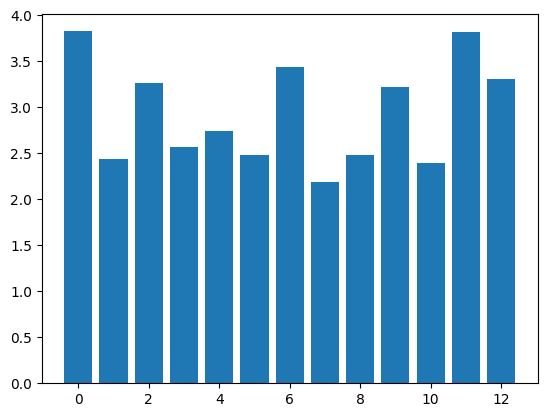

In [ ]:
print(scores)

import matplotlib.pyplot as plt

plt.bar(range(len(scores)), scores)
plt.show()

In [ ]:
import pandas as pd

# Supongamos que "matrix" es la matriz numérica generada en el código anterior
df = pd.DataFrame(matrix.toarray(), columns=vectorizer.vocabulary_.keys())

# Mostrar la tabla
display(df)


,el,morphing,de,suplantación,identidad,...,coordinada,eficaz,parte,autoridades,sociedad
0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.256464,0.000000,...,0.000000,0.000000,0.000000,0.256464,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.209235,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.277355,...,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238337,0.000000,0.000000,0.000000,0.205533
5,0.267084,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.230323,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.195189
7,0.000000,0.248669,0.248669,0.000000,0.000000,...,0.000000,0.000000,0.248669,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import numpy as np

# Obtener los índices que ordenan el array de menor a mayor y luego invertir el orden
indices_descendentes = np.argsort(-scores)

# Ordenar el array original utilizando los índices ordenados de mayor a menor
scores_ordenados = scores[indices_descendentes]

# Mostrar el resultado
print(scores_ordenados)

#import matplotlib.pyplot as plt

#plt.bar(range(len(scores_ordenados)), scores_ordenados)
#plt.show()

[3.82 3.82 3.44 3.31 3.26 3.22 2.74 2.57 2.49 2.48 2.44 2.39 2.19]


In [ ]:
import numpy as np 

# Pedir el porcentaje deseado para el resumen
porcentaje_resumen = input("Introducir un porcentaje deseado para el resumen: ")

# Calcular el número de oraciones para el resumen
porcentaje = int(porcentaje_resumen)
num_sentences = round(len(sentences) * porcentaje / 100) #Seleccionar el % de las oraciones más importantes
top_sentences = np.argsort(scores)[-num_sentences:] #Vector que contiene los índices de las oraciones más relevantes del texto.
resumen = [sentences[i] for i in sorted(top_sentences)] #Lista de las oraciones más relevantes del texto. Captura la esencia del texto original en un número reducido de oraciones.

texto = ' '.join(resumen) #Unir las oraciones del resumen del texto en una sola cadena de texto.

# Obtener el título y el texto a resumir
print(titulo + ":\n")

#Procesar el texto y obtener las oraciones
resumen_limpio = re.sub(r'\[\d+\]', '', texto)
print(resumen_limpio)

# Procesar el texto con spaCy
nlp = spacy.load("es_core_news_lg")
doc = nlp(resumen_limpio)

num_words = sum(len(sentence.split()) for sentence in resumen)
print("\nNúmero de palabras en el resumen:", num_words)

# Número de oraciones en el resumen
num_oraciones = len(list(doc.sents))
print("El resumen contiene", num_oraciones, "oraciones.")

from IPython.core.display import display, HTML
display(HTML("<style>pre { white-space: pre-wrap; }</style>"))

Introducir un porcentaje deseado para el resumen: 75
Morphing de suplantación de identidad: una amenaza para la seguridad.:

 El morphing de suplantación de identidad es una amenaza para la seguridad nacional e internacional, ya que puede facilitar el tráfico de personas, el terrorismo, el fraude o el espionaje. Para prevenir y detectar el morphing de suplantación de identidad, se necesitan medidas tanto técnicas como legales. Por un lado, se debe mejorar la calidad y la seguridad de los documentos de identidad, incorporando elementos que dificulten la manipulación o que permitan verificar la autenticidad de las imágenes. El morphing de suplantación de identidad es una técnica que aprovecha el avance de la inteligencia artificial para crear imágenes falsas que engañan a los sistemas biométricos faciales. Se trata de una amenaza que puede poner en peligro la seguridad y la identidad de las personas, y que requiere una respuesta coordinada y eficaz por parte de las autoridades y la socie

## ***EVALUACIÓN DEL RESUMEN GENERADO UTILIZANDO LA MÉTRICA ROUGE-1:***

Considerar a R como el texto original y el resumen como C:

- R: The cat is on the mat.
- C: The cat and the dog.

ROUGE-1 ***precision*** se puede calcular como la relación entre el número de unigramas en C que aparecen también en R (es decir, las palabras "the", "cat" y "the"), sobre el número de unigramas en C.

- ROUGE-1 precision = 3/5 = 0.6

ROUGE-1 ***recall*** se puede calcular como la razón del número de unigramas en R que aparecen también en C (es decir, las palabras "the", "cat" y "the"), sobre el número de unigramas en R.

-ROUGE-1 recall = 3/6 = 0.5

Entonces, la puntuación F1 de ROUGE-1 se puede obtener directamente a partir de la precisión y recall de ROUGE-1 utilizando la fórmula de puntuación F1 estándar.

- ROUGE-1 F1-score = 2 * (precision * recall) / (precision + recall) = 2 * (0.6 * 0.5) / (0.6 + 0.5) = 2 * (0.3)/(1.1) = 2 * 0.2727 = 0.545454

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

texto = texto_limpio
resumen = resumen_limpio

rouge = Rouge()
scores = rouge.get_scores(texto, resumen)

rouge1_score = scores[0]['rouge-1']['f']
rouge1_precision = scores[0]['rouge-1']['p']
rouge1_recall = scores[0]['rouge-1']['r']

print("ROUGE-1 Precision:", rouge1_precision)
print("ROUGE-1 Recall:", rouge1_recall)
print("ROUGE-1 F-Score:", rouge1_score)


ROUGE-1 Precision: 0.29215017064846416
ROUGE-1 Recall: 1.0
ROUGE-1 F-Score: 0.45219228387500426
